In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/Salary_Data.csv")

In [3]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


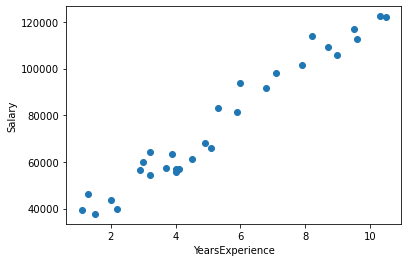

In [29]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [30]:
x = df.Salary.values.reshape(-1,1)
x

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [31]:
y = df.YearsExperience.values.reshape(-1,1)
y

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [100]:
train_input, test_input, train_target, test_target = train_test_split(
    x, y, random_state=3)

In [101]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

In [102]:
train_input

array([[ 66029.],
       [ 46205.],
       [ 83088.],
       [112635.],
       [ 54445.],
       [ 56957.],
       [ 39891.],
       [113812.],
       [ 60150.],
       [ 91738.],
       [ 57189.],
       [ 55794.],
       [121872.],
       [ 93940.],
       [ 98273.],
       [ 39343.],
       [ 64445.],
       [122391.],
       [ 43525.],
       [105582.],
       [109431.],
       [ 63218.]])

In [103]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [104]:
print(knr.predict(test_input))

[[4.06666667]
 [3.9       ]
 [7.36666667]
 [9.43333333]
 [6.03333333]
 [3.36666667]
 [3.9       ]
 [1.76666667]]


In [105]:
import matplotlib.pyplot as plt

In [106]:
print(np.mean(train_target))

5.372727272727273


In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
y_pred = lr.predict(test_input)

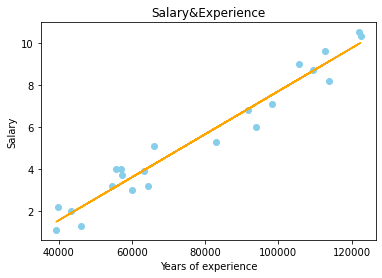

In [131]:
plt.scatter(train_input, train_target, color='skyblue')
plt.plot(train_input, lr.predict(train_input), color='orange')
plt.title("Salary&Experience")
plt.xlabel("Salary")
plt.ylabel("Years of experience")
plt.show()

In [132]:
lr.score(test_input, test_target)

0.9646984478845

In [133]:
from sklearn.metrics import mean_absolute_error

In [134]:
# 테스트 세트에 대한 예측을 만듭니다
y_pred = lr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_pred)
print(mae)

0.35409818811752736


In [135]:
print(lr.predict([[20000]]))

[[-0.49452489]]


In [136]:
print(lr.coef_, lr.intercept_)

[[0.00010245]] [-2.54348303]


In [138]:
print(lr.predict([[130000]]))

[[10.77474487]]


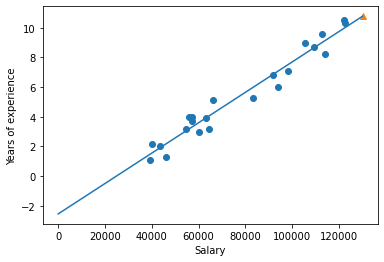

In [146]:
plt.scatter(train_input, train_target)
#130000
plt.plot([0, 130000], [float(lr.coef_+lr.intercept_), float(130000*lr.coef_+lr.intercept_)])
plt.scatter(130000, 10.77474487, marker='^')
plt.xlabel("Salary")
plt.ylabel("Years of experience")
plt.show()